## Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import sklearn.externals
import joblib 

In [2]:
df_train = pd.read_csv("statistics_10_train.csv" , sep = ',')
df_test = pd.read_csv("statistics_10_test.csv" , sep = ',')

In [3]:
X_train = df_train[['Kurtosis', 'Impulse factor', 'RMS', 'Margin factor', 'Skewness',
               'Shape factor', 'Peak to peak', 'Crest factor']].values
y_train = df_train['Tipo'].values
X_test = df_test[['Kurtosis', 'Impulse factor', 'RMS', 'Margin factor', 'Skewness',
               'Shape factor', 'Peak to peak', 'Crest factor']].values
y_test = df_test['Tipo'].values

In [5]:
arr_estimators = range(1, 101)
scores_train = []
scores_test = []
for i in arr_estimators:
    randomForest = RandomForestClassifier(random_state=0, n_estimators = i, min_samples_split = 2, min_samples_leaf  = 1)
    randomForest.fit(X_train, y_train)
    scores_train.append(randomForest.score(X_train, y_train))
    scores_test.append(randomForest.score(X_test, y_test))
    if (i % 10 == 0 or i == 1):
        print('----- n trees: ' + str(i) + '----- Accuracy test: ' + str(scores_test[i - 1]) + '-----')

----- n trees: 1----- Accuracy test: 0.9555555555555556-----
----- n trees: 10----- Accuracy test: 0.9444444444444444-----
----- n trees: 20----- Accuracy test: 0.9555555555555556-----
----- n trees: 30----- Accuracy test: 0.9444444444444444-----
----- n trees: 40----- Accuracy test: 0.9444444444444444-----
----- n trees: 50----- Accuracy test: 0.9444444444444444-----
----- n trees: 60----- Accuracy test: 0.9444444444444444-----
----- n trees: 70----- Accuracy test: 0.9555555555555556-----
----- n trees: 80----- Accuracy test: 0.9444444444444444-----
----- n trees: 90----- Accuracy test: 0.9555555555555556-----
----- n trees: 100----- Accuracy test: 0.9555555555555556-----


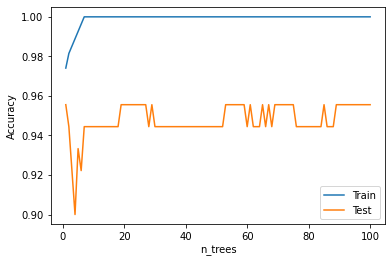

In [6]:
plt.figure()
plt.xlabel('n_trees')
plt.ylabel('Accuracy')
plt.plot(arr_estimators, scores_train, label = 'Train')
plt.plot(arr_estimators, scores_test, label = 'Test')
plt.legend()

In [7]:
randomForest = RandomForestClassifier(random_state=0, n_estimators = 90, min_samples_split = 2, min_samples_leaf  = 1)

In [8]:
randomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=90, random_state=0)

In [9]:
target_names = ['Inner', 'Outer', 'Healthy']
pred = randomForest.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, target_names = target_names))

[[28  2  0]
 [ 0 30  0]
 [ 0  2 28]]
              precision    recall  f1-score   support

       Inner       1.00      0.93      0.97        30
       Outer       0.88      1.00      0.94        30
     Healthy       1.00      0.93      0.97        30

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



In [10]:
pred_train = randomForest.predict(X_train)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train, target_names = target_names))

[[90  0  0]
 [ 0 90  0]
 [ 0  0 90]]
              precision    recall  f1-score   support

       Inner       1.00      1.00      1.00        90
       Outer       1.00      1.00      1.00        90
     Healthy       1.00      1.00      1.00        90

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



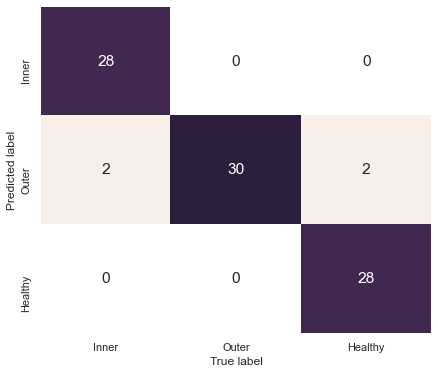

In [11]:
sns.set()
mat = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(7,6))
sns.set(font_scale=1.3)
sns.heatmap(mat.T, square=False, annot=True, fmt='d', cbar=False,
            xticklabels=['Inner', 'Outer', 'Healthy'],
            yticklabels=['Inner', 'Outer', 'Healthy'],
            cmap=sns.cubehelix_palette(light=1, as_cmap=True))

plt.xlabel('True label');
plt.ylabel('Predicted label');

In [12]:
joblib.dump(randomForest, 'randomForest_traintest_trained.pkl') # Guardo el modelo.

['randomForest_traintest_trained.pkl']